In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-02-14 10:43:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  40.5MB/s    in 4.7s    

2022-02-14 10:43:50 (40.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-02-14 10:43:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [2]:
import tensorflow as tf

In [3]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-006.png', 'rock03-011.png', 'rock01-009.png', 'rock07-k03-119.png', 'rock07-k03-087.png', 'rock05ck01-014.png', 'rock03-068.png', 'rock04-062.png', 'rock01-056.png', 'rock06ck02-000.png']
['paper04-118.png', 'paper02-013.png', 'paper02-028.png', 'paper04-096.png', 'paper06-108.png', 'paper06-113.png', 'paper06-011.png', 'paper03-081.png', 'paper05-051.png', 'paper03-037.png']
['scissors04-093.png', 'scissors03-018.png', 'testscissors02-005.png', 'scissors02-066.png', 'scissors03-008.png', 'testscissors01-048.png', 'scissors02-054.png', 'testscissors01-111.png', 'testscissors01-114.png', 'testscissors03-040.png']


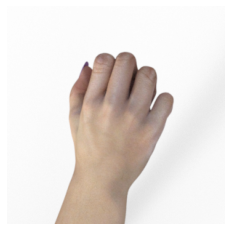

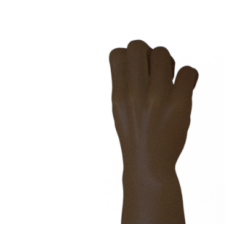

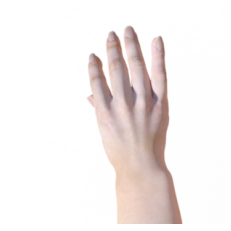

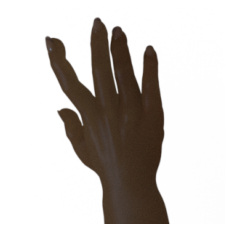

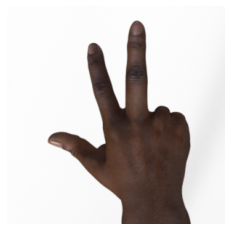

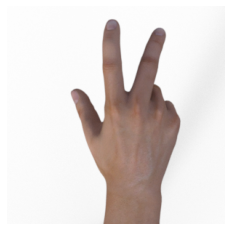

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [7]:
TRAINING_DIR = "/tmp/rps/"
tarin_data = ImageDataGenerator( rescale=1/255.0,
                                rotation_range = 50,
                                shear_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True
                                )

In [8]:
VALIDATION_DIR = "/tmp/rps-test-set/"
valid_data = ImageDataGenerator(rescale=1/255.0)

In [9]:
train_gen = tarin_data.flow_from_directory(TRAINING_DIR,
                                           target_size = (150,150),
                                           class_mode = 'categorical',
                                           batch_size = 126
                                           )

Found 2520 images belonging to 3 classes.


In [10]:
valid_gen = valid_data.flow_from_directory(VALIDATION_DIR,
                                           target_size = (150,150),
                                           class_mode = 'categorical',
                                           batch_size = 126
                                           )

Found 372 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding='same',    activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding='same',  activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),padding='same',  activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), padding='same',  activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
geo = model.fit(train_gen,
                steps_per_epoch = 20,
                epochs = 30,
                validation_data = valid_gen,
                validation_steps = 3)

Epoch 1/30
20/20 [==============================] - 38s 1s/step - loss: 1.0988 - accuracy: 0.3329 - val_loss: 1.0865 - val_accuracy: 0.6505
Epoch 2/30
20/20 [==============================] - 23s 1s/step - loss: 1.0036 - accuracy: 0.4798 - val_loss: 0.7013 - val_accuracy: 0.7177
Epoch 3/30
20/20 [==============================] - 23s 1s/step - loss: 0.7937 - accuracy: 0.6079 - val_loss: 0.4797 - val_accuracy: 0.9032
Epoch 4/30
20/20 [==============================] - 23s 1s/step - loss: 0.5955 - accuracy: 0.7389 - val_loss: 0.3792 - val_accuracy: 0.8360
Epoch 5/30
20/20 [==============================] - 24s 1s/step - loss: 0.5224 - accuracy: 0.7790 - val_loss: 0.5525 - val_accuracy: 0.8011
Epoch 6/30
20/20 [==============================] - 24s 1s/step - loss: 0.5484 - accuracy: 0.7841 - val_loss: 0.2713 - val_accuracy: 0.9435
Epoch 7/30
20/20 [==============================] - 23s 1s/step - loss: 0.2497 - accuracy: 0.9071 - val_loss: 0.2404 - val_accuracy: 0.9274
Epoch 8/30
20/20 [==

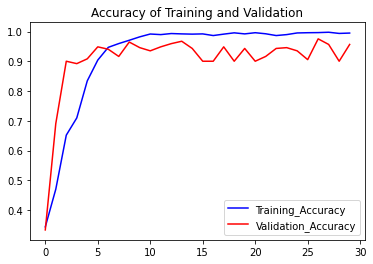

<Figure size 1440x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = geo.history['accuracy']
valid_acc = geo.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label = 'Training_Accuracy')
plt.plot(epochs, valid_acc, 'r', label = 'Validation_Accuracy')
plt.title('Accuracy of Training and Validation')
plt.legend(loc=0)
plt.figure(figsize=(20,10))
plt.show()